In [1]:
#importing the libraries for numpy, pandas, seaborn, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import pandas_profiling
import statsmodels.api as sm
import statsmodels.formula.api as smf


#importing the libraries for svm, SVC, GridSearchCV, pyplot, metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from IPython.display import Image
from IPython.core.display import HTML 

plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

warnings.filterwarnings('ignore')
%matplotlib inline

### White wine is a wine that is fermented without skin contact. The colour can be straw-yellow, yellow-green, or yellow-gold. It is produced by the alcoholic fermentation of the non-coloured pulp of grapes, which may have a skin of any colour. White wine has existed for at least 2500 years.
<img src="WhiteWine.JPG" alt="PH Meter" width="600"/>

### Details on dataset

Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   
   1 - fixed acidity (tartaric acid - g / dm^3)
   
   2 - volatile acidity (acetic acid - g / dm^3)
   
   3 - citric acid (g / dm^3)
   
   4 - residual sugar (g / dm^3)
   
   5 - chlorides (sodium chloride - g / dm^3
   
   6 - free sulfur dioxide (mg / dm^3)
   
   7 - total sulfur dioxide (mg / dm^3)
   
   8 - density (g / cm^3)
   
   9 - pH
   
   10 - sulphates (potassium sulphate - g / dm3)
   
   11 - alcohol (% by volume)
   
   Output variable (based on sensory data): 
   
   12 - quality (score between 0 and 10)
   

Missing Attribute Values: None

Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

In [2]:
#import CSV file
df_white=pd.read_csv('winequality-white.csv', delimiter=';')
df_white.head()
df_white.shape
df_white.info()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

(4898, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
pandas_profiling.ProfileReport(df_white)

In [4]:
n_wines = df_white.shape[0]
# Number of wines with quality rating above 6
quality_above_6 = df_white.loc[(df_white['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]
# Number of wines with quality rating below 5
quality_below_5 = df_white.loc[(df_white['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]
# Number of wines with quality rating between 5 to 6
quality_between_5 = df_white.loc[(df_white['quality'] >= 5) & (df_white['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]
# Percentage of wines with quality rating above 6
greater_percent = n_above_6*100/n_wines
# Print the results
print("Total number of white wine data: {}".format(n_wines))
print("White Wines with rating 7 and above: {}".format(n_above_6))
print("White Wines with rating less than 5: {}".format(n_below_5))
print("White Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of white wines with quality 7 and above: {:.2f}%".format(greater_percent))
# Some more additional  data analysis
display(np.round(df_white.describe()))

Total number of white wine data: 4898
White Wines with rating 7 and above: 1060
White Wines with rating less than 5: 183
White Wines with rating 5 and 6: 3655
Percentage of white wines with quality 7 and above: 21.64%


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count         4898.0            4898.0       4898.0          4898.0   
mean             7.0               0.0          0.0             6.0   
std              1.0               0.0          0.0             5.0   
min              4.0               0.0          0.0             1.0   
25%              6.0               0.0          0.0             2.0   
50%              7.0               0.0          0.0             5.0   
75%              7.0               0.0          0.0            10.0   
max             14.0               1.0          2.0            66.0   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density      pH  \
count     4898.0               4898.0                4898.0   4898.0  4898.0   
mean         0.0                 35.0                 138.0      1.0     3.0   
std          0.0                 17.0                  42.0      0.0     0.0   
min          0.0                  2.0                   9.0      1.0     3.0   
25%          0.0                 23.0                 108.0      1.0     3.0   
50%          0.0                 34.0                 134.0      1.0     3.0   
75%          0.0                 46.0                 167.0      1.0     3.0   
max          0.0                289.0                 440.0      1.0     4.0   

       sulphates  alcohol  quality  
count     4898.0   4898.0   4898.0  
mean         0.0     11.0      6.0  
std          0.0      1.0      1.0  
min          0.0      8.0      3.0  
25%          0.0     10.0      5.0  
50%          0.0     10.0      6.0  
75%          1.0     11.0      6.0  
max          1.0     14.0      9.0

In [5]:
print("white wine mean = ",df_white["quality"].mean())

white wine mean =  5.87790935075541


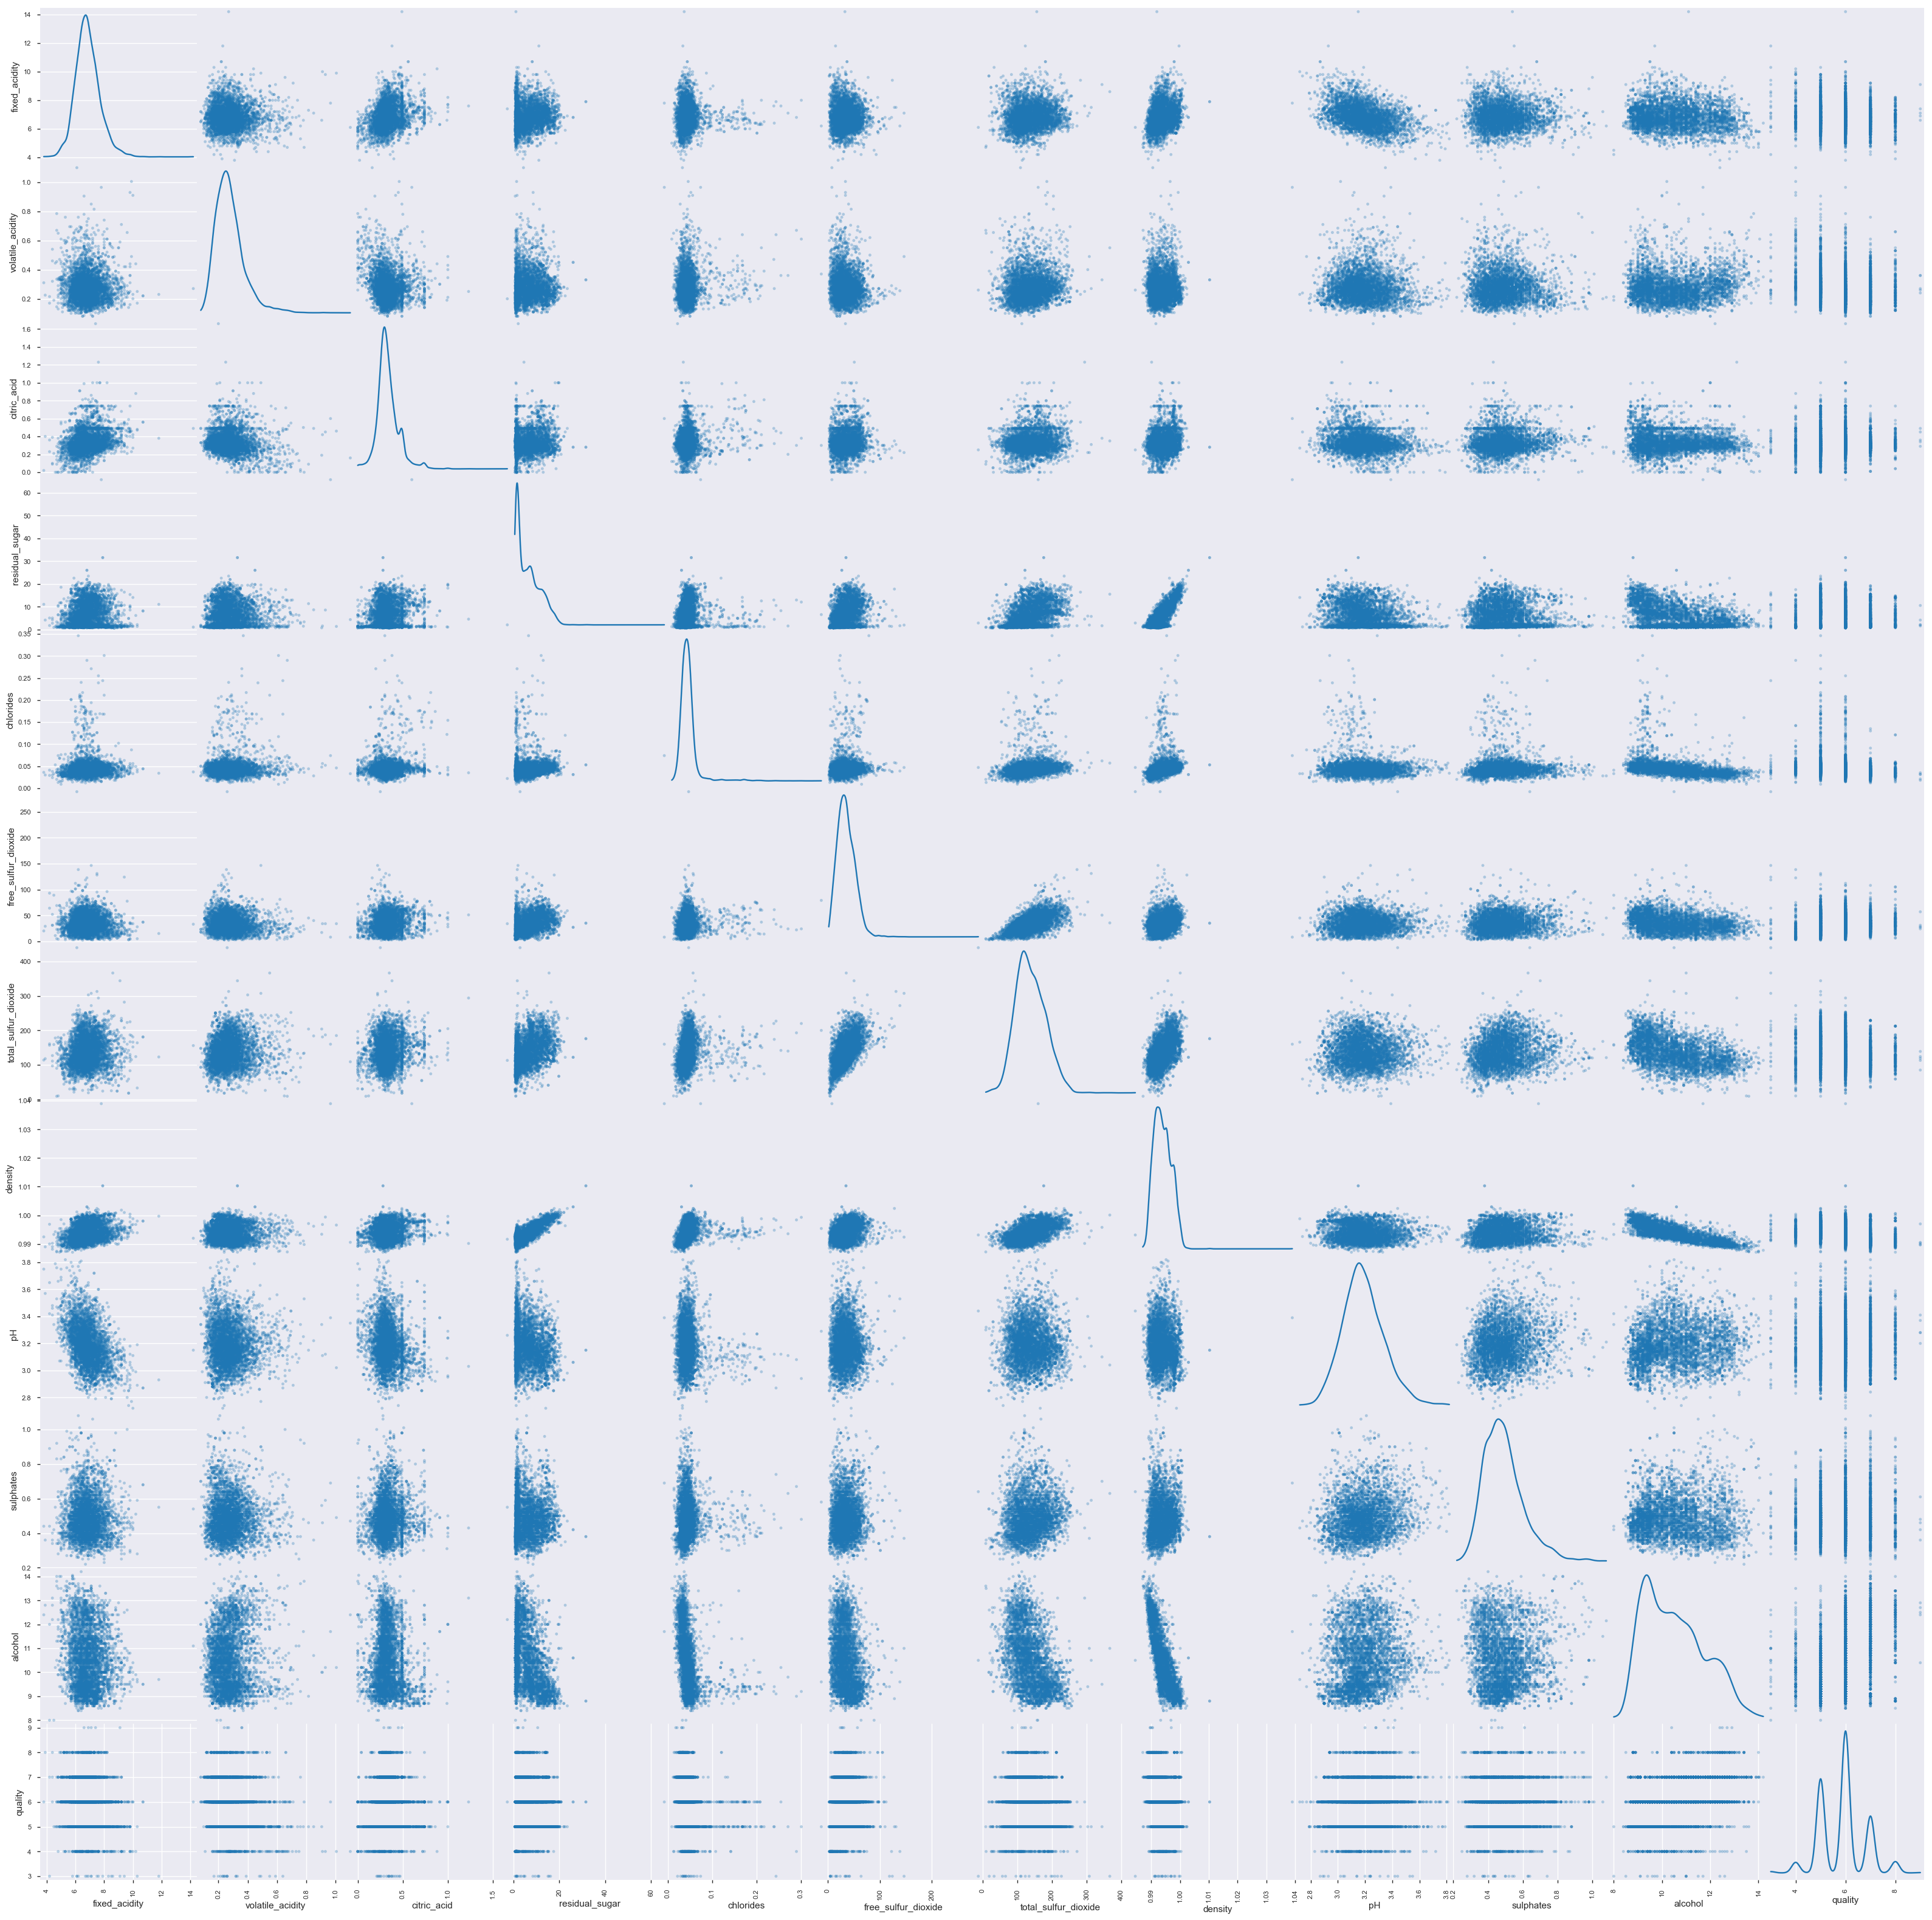

In [6]:
pd.plotting.scatter_matrix(df_white, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

In [7]:
df_w_corr=df_white.corr()
df_w_corr

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.022697     0.289181   
volatile_acidity          -0.022697          1.000000    -0.149472   
citric_acid                0.289181         -0.149472     1.000000   
residual_sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free_sulfur_dioxide       -0.049396         -0.097012     0.094077   
total_sulfur_dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.089021   0.023086            -0.049396   
volatile_acidity            0.064286   0.070512            -0.097012   
citric_acid                 0.094212   0.114364             0.094077   
residual_sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free_sulfur_dioxide         0.299098   0.101392             1.000000   
total_sulfur_dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile_acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric_acid                       0.121131  0.149503 -0.163748   0.062331   
residual_sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free_sulfur_dioxide               0.615501  0.294210 -0.000618   0.059217   
total_sulfur_dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed_acidity        -0.120881 -0.113663  
volatile_acidity      0.067718 -0.194723  
citric_acid          -0.075729 -0.009209  
residual_sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free_sulfur_dioxide  -0.250104  0.008158  
total_sulfur_dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

(<Figure size 2000x1500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25a2f4e99e8>)

Text(0.5, 1.0, 'Wine Characteristic Correlation Heatmap (Reds)')

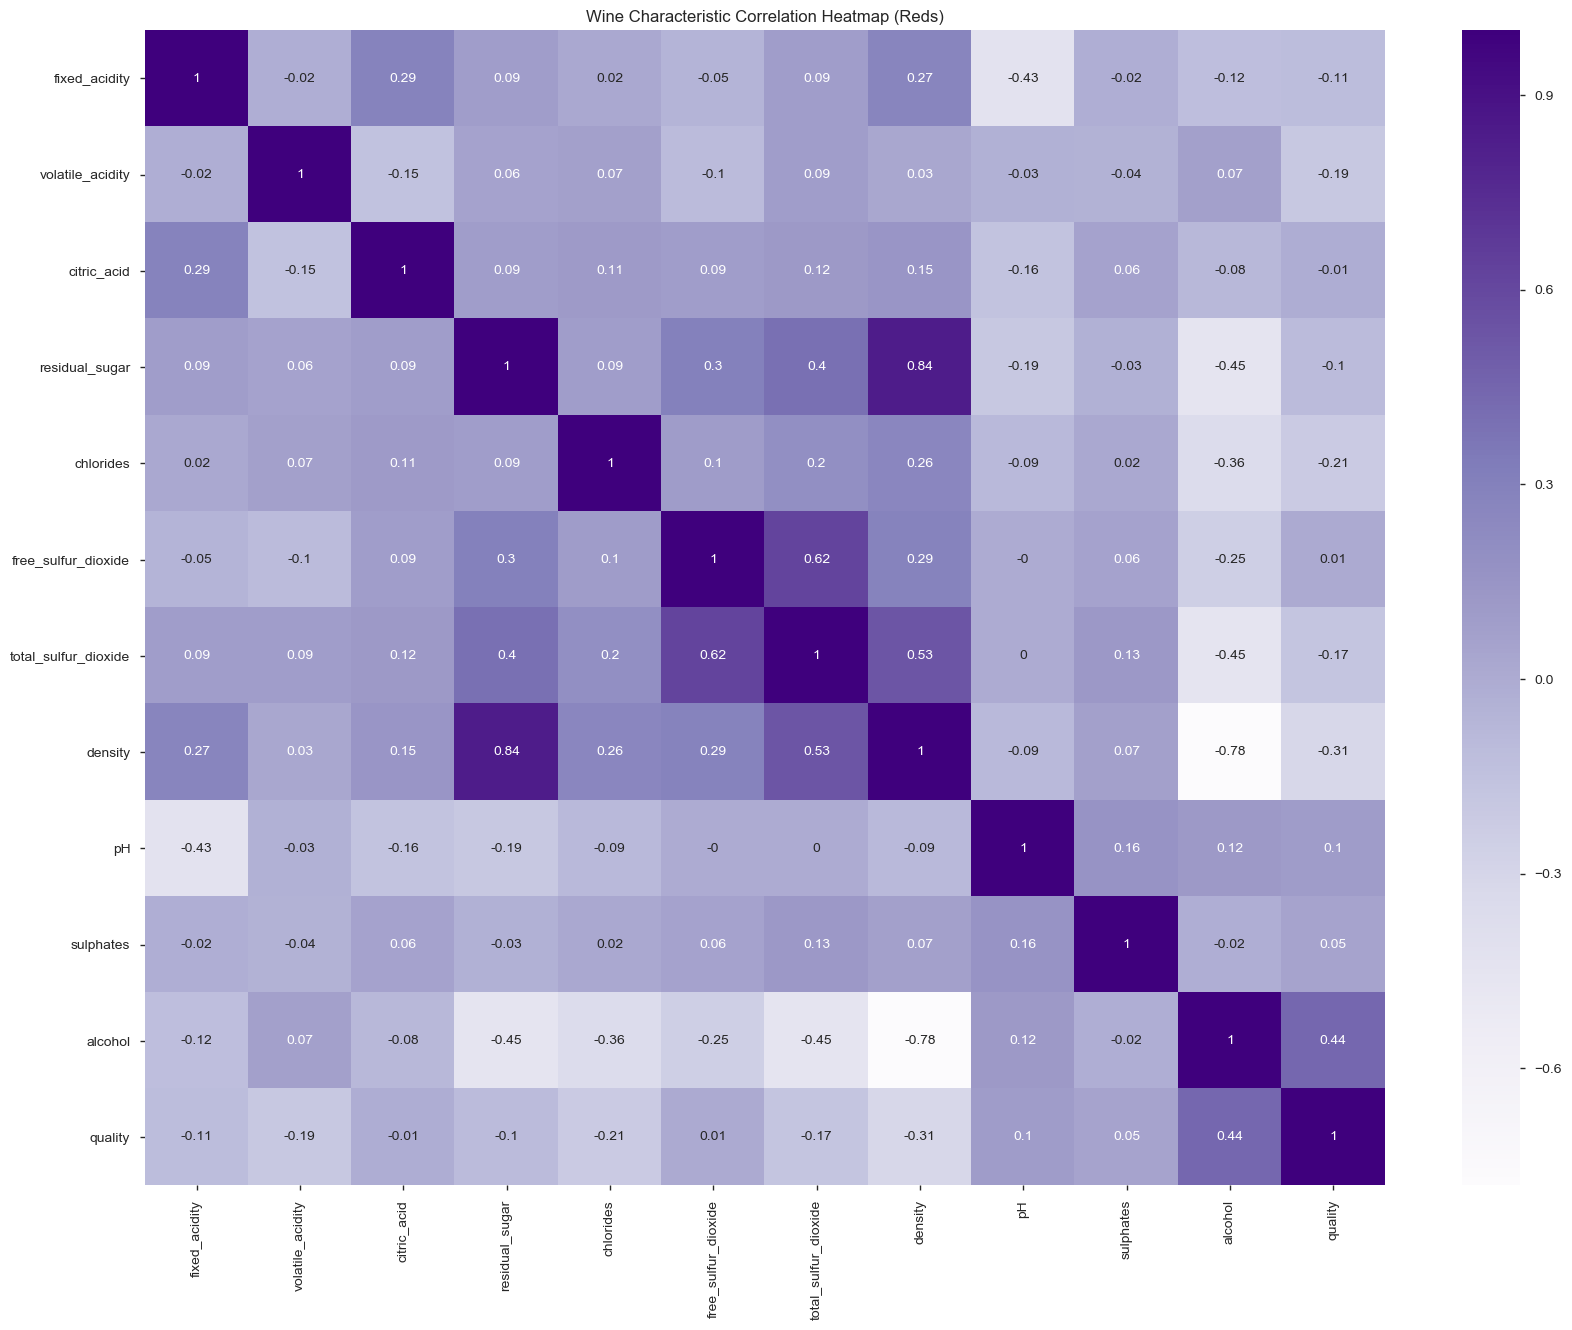

In [8]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_white.corr().round(2)
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")

## pH vs. Fixed Acidity

Fixed Acidity

Titratable acidity, sometimes referred to as fixed acidity, is a measurement of the total concentration of titratable acids and free hydrogen ions present in your wine. A litmus paper can be used to identify whether a given solution is acidic or basic. The most common titratable acids are tartaric, malic, citric and carbonic acid. These acids, along with many more in smaller quantities, either occur naturally in the grapes or are created through the fermentation process.

PH

pH stands for power of hydrogen, which is a measurement of the hydrogen ion concentration in the solution. Generally, solutions with a pH value less than 7 are considered acidic, with some of the strongest acids being close to 0. Solutions above 7 are considered alkaline or basic. The pH value of water is 7, as it is neither an acid nor a base.
<img src="PHCapture.JPG" alt="PH Meter" width="400"/>

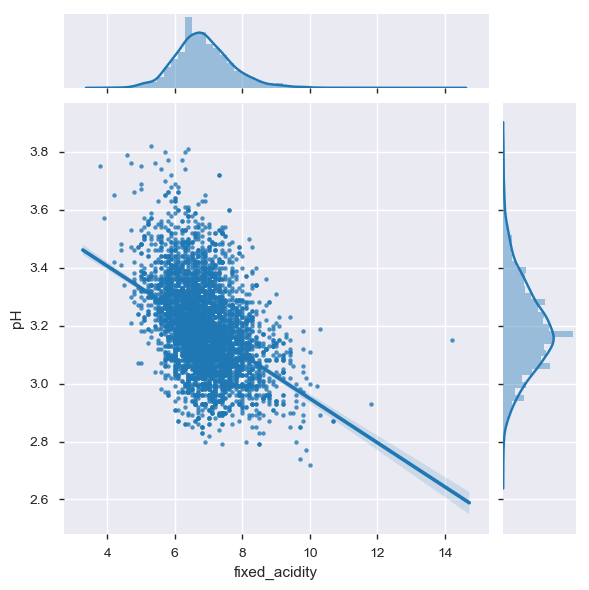

In [9]:
#Visualize the co-relation between pH and fixed Acidity
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = df_white[['pH', 'fixed_acidity']]
#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed_acidity", y="pH", data=fixedAcidity_pH, size=6)
#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

Based on PH value which seems to be between 2.8 to 4.0 which is lower than 7 base PH value. So it will be soar in taste as the nature of white wine.

## Fixed Acidity vs. Citric Acid

Fixed Acidity

Titratable acidity, sometimes referred to as fixed acidity, is a measurement of the total concentration of titratable acids and free hydrogen ions present in your wine. A litmus paper can be used to identify whether a given solution is acidic or basic. The most common titratable acids are tartaric, malic, citric and carbonic acid. These acids, along with many more in smaller quantities, either occur naturally in the grapes or are created through the fermentation process.

Citric Acid

Citric acid is generally found in very small quantities in wine grapes. It acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. Excess addition, however, can ruin the taste.

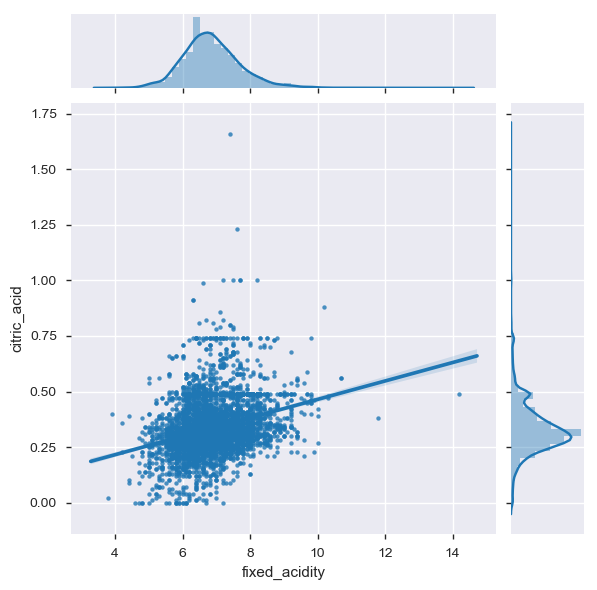

In [10]:
fixedAcidity_citricAcid = df_white[['citric_acid', 'fixed_acidity']]
g = sns.JointGrid(x="fixed_acidity", y="citric_acid", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

Also Citric Acid is in between 0 to 1.25 which seems to be an average. and Fixed acidity occur naturally in the grapes or are created through the fermentation process

## Volatile Acidity vs Quality

Volatile Acidity

Volatile acidity (VA) is a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar.

Volatile acidity concentration is regulated by the federal Tax and Trade Bureau, and allowable levels for various wine styles can be found in the Code of Federal Regulations (CFR). In general, per the CFR: "The maximum volatile acidity, calculated as acetic acid and exclusive of sulfur dioxide, is 0.14 g/100 mL for red wine and 0.12 g/100 mL for white wines." 

Text(0.5, 1.0, 'quality VS volatile acidity')

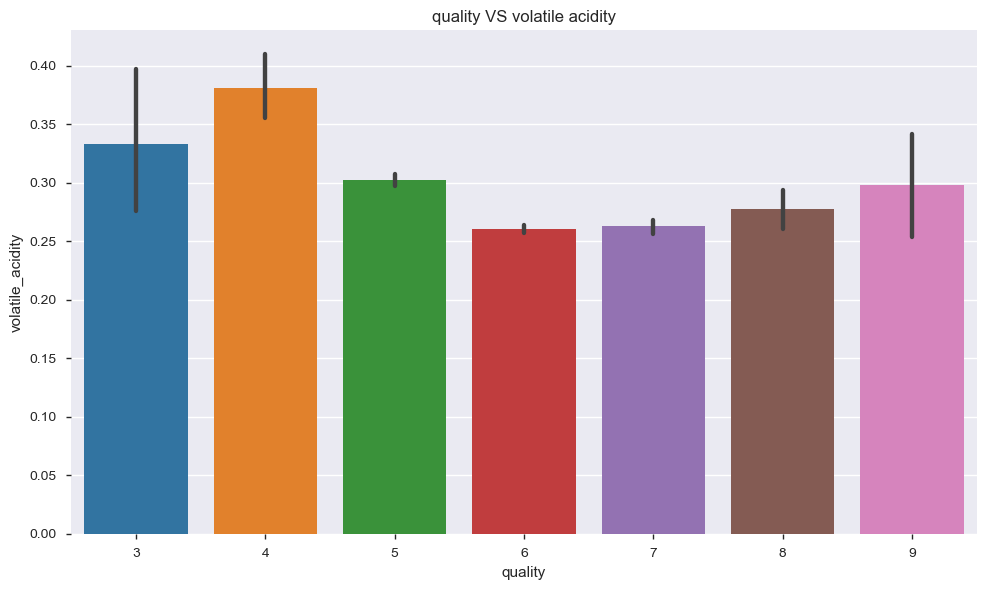

<Figure size 800x550 with 0 Axes>

In [11]:
volatileAcidity_quality = df_white[['volatile_acidity', 'quality']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile_acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')
plt.tight_layout()
plt.show()
plt.gcf().clear()

Alcohol vs. Quality

Text(0.5, 0, 'Quality level of wine (0-10 scale)')

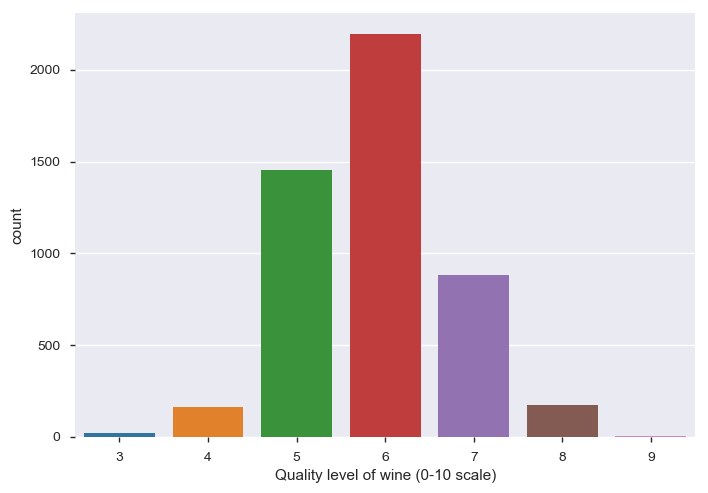

In [12]:
df_white["quality"] = pd.Categorical(df_white["quality"])
sns.countplot(x="quality", data=df_white)
plt.xlabel("Quality level of wine (0-10 scale)")
plt.show()

Text(0.5, 9.444444444444473, 'Quality level of wine, 0-10 scale')

Text(13.319444444444452, 0.5, 'Alcohol level in wine, % ABV')

Text(0.5, 1.0, "Alcohol percent in each level of white wine's quality")

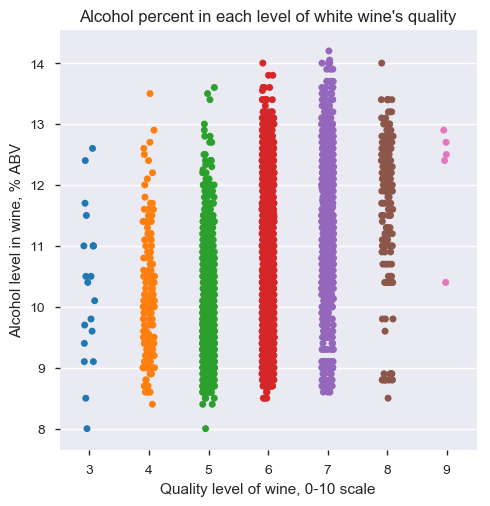

In [13]:
sns.factorplot(x="quality", y="alcohol", data=df_white, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")
plt.title("Alcohol percent in each level of white wine's quality")
plt.show()

Text(0.5, 1.0, 'quality VS alcohol')

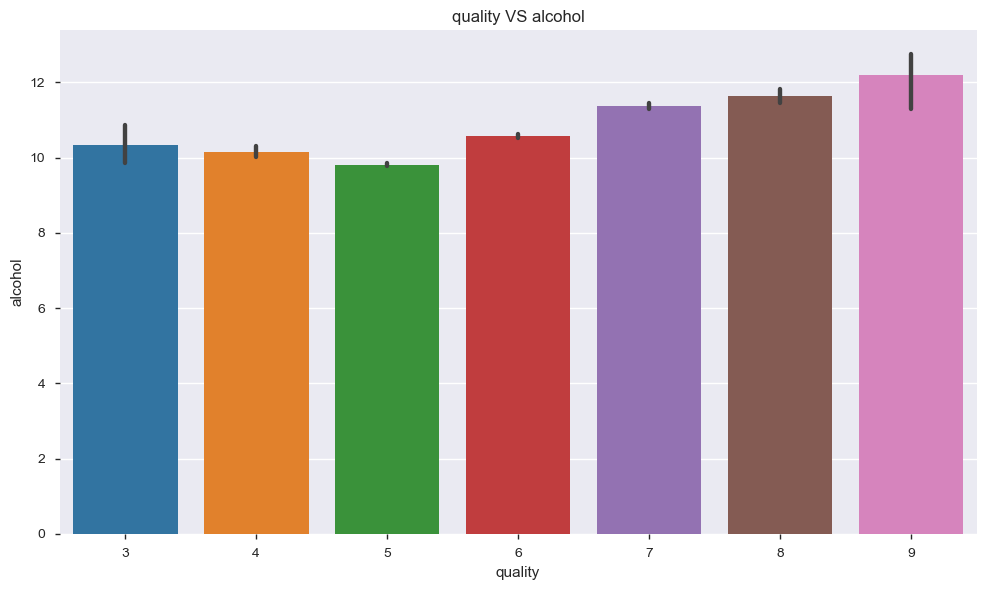

<Figure size 800x550 with 0 Axes>

In [14]:
quality_alcohol = df_white[['quality', 'alcohol']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()
plt.gcf().clear()

## Preprocessing Data for performing Machine learning algorithms

In [15]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_white['quality'] = pd.cut(df_white['quality'], bins = bins, labels = group_names)

In [16]:
df_white['quality'].value_counts()

bad     3838
good    1055
Name: quality, dtype: int64

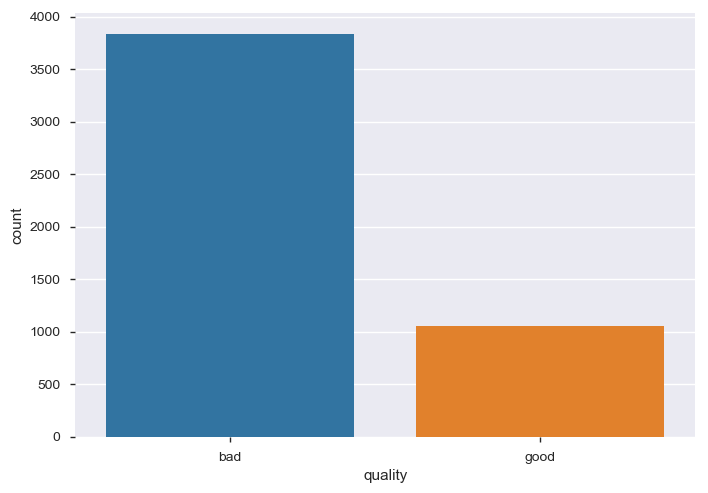

In [17]:
sns.countplot(df_white['quality'])

In [18]:
# Categorical into 1 quality:
df_white['quality'] = pd.Categorical(df_white['quality']).codes

In [19]:
#Create Features and Labels
y = df_white['quality']
x = df_white.drop('quality', axis=1)
df_white.head(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        0  
1      9.5        0  
2     10.1        0  
3      9.9        0  
4      9.9        0  
5     10.1        0  
6      9.6        0  
7      8.8        0  
8      9.5        0  
9     11.0        0

In [20]:
#Create train and test 70% and 30% split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(3428, 11)

(1470, 11)

(3428,)

(1470,)

pandas.core.frame.DataFrame

## Evaluating Classifiers Performance

### Linear Discriminant Analysis (LDA)

In [21]:
#Fit LDA on training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda = LinearDiscriminantAnalysis()
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

In [22]:
# Explained Variance
str(sklearn_lda.explained_variance_ratio_)

'[0.98127394 0.01872606]'

In [23]:
# Use LDA to make prediction on test data
print('Confusion Matrix on the LDA-Classifier')
print(metrics.confusion_matrix(y_test, sklearn_lda.predict(X_test)))

Confusion Matrix on the LDA-Classifier
[[   0    0    0]
 [   1 1067   73]
 [   0  230   99]]


In [24]:
# Compute Accuracy of classification
pred_test_lda = sklearn_lda.predict(X_test)
metrics.accuracy_score(y_test,pred_test_lda)

0.7931972789115647

In [25]:
lda = LinearDiscriminantAnalysis().fit(x,y)

In [26]:
df=pd.DataFrame(lda.scalings_, index=x.columns, columns=('LD1','LD2'))
df

LD1         LD2
fixed_acidity          -0.302043   -1.419709
volatile_acidity        1.914409   -4.089525
citric_acid             0.201186   -2.676072
residual_sugar         -0.197880   -0.235385
chlorides               1.706308    3.186757
free_sulfur_dioxide    -0.009123   -0.004468
total_sulfur_dioxide    0.001543    0.001690
density               417.156321  644.992864
pH                     -2.180024   -6.873726
sulphates              -1.731807    1.736010
alcohol                -0.391441    0.812683

In [27]:
# Explained Variance
lda.explained_variance_ratio_

array([0.98598579, 0.01401421])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<Figure size 1500x1500 with 0 Axes>

Text(0.5, 0, 'LD 1')

Text(0, 0.5, 'LD 2')

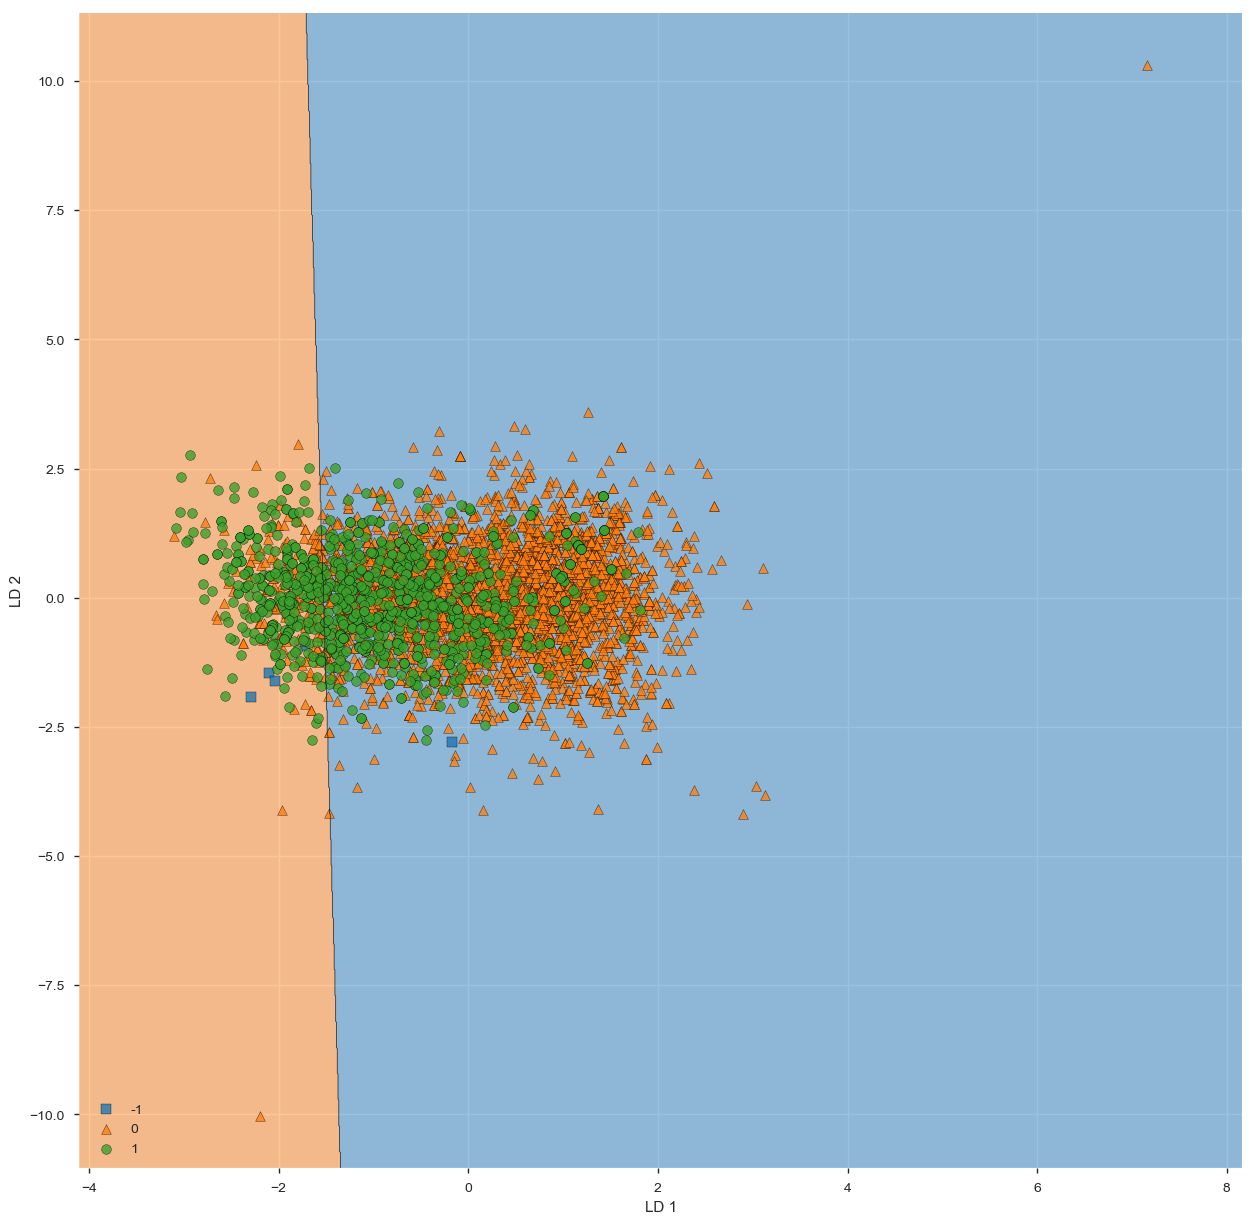

In [28]:
# Use LDs as input in Logistic Regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.plotting import plot_decision_regions
lda = LDA()
X_train_lda = lda.fit_transform(x,y)
y= np.array(y)
logregr=LogisticRegression()
logregr.fit(X_train_lda,y)

plt.figure(figsize=(15,15))
plot_decision_regions(X_train_lda, y, clf = logregr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

## Support Vector Machine

In [29]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [30]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(svm_clf, x,y, cv=cv)  

array([0.8122449 , 0.8292517 , 0.79795918, 0.82380952, 0.81428571])

In [31]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
scores = cross_val_score(clf, x,y, cv=cv)
scores
print('The mean score and the 95% confidence interval of the score estimate are hence given by:')
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

array([0.81564626, 0.82517007, 0.8122449 , 0.81292517, 0.81836735])

The mean score and the 95% confidence interval of the score estimate are hence given by:
Accuracy: 0.82 (+/- 0.01)


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
scoring = {'prec_macro': 'precision_macro','rec_micro': make_scorer(recall_score, average='macro')}

scores = cross_validate(svm_clf, x, y, scoring=scoring, cv=5, return_train_score=True)
sorted(scores.keys())
scores

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_micro',
 'train_prec_macro',
 'train_rec_micro']

{'fit_time': array([0.87350011, 0.93244863, 1.03338671, 1.00842071, 0.98141837]),
 'score_time': array([0.22089195, 0.22588992, 0.23688531, 0.2848382 , 0.21589589]),
 'test_prec_macro': array([0.42735951, 0.45127819, 0.47663597, 0.40772339, 0.37572291]),
 'train_prec_macro': array([0.6153665 , 0.61506743, 0.61288017, 0.61782626, 0.61783295]),
 'test_rec_micro': array([0.35466858, 0.365293  , 0.39341635, 0.37775457, 0.36088781]),
 'train_rec_micro': array([0.54348457, 0.53907097, 0.53411447, 0.5395063 , 0.55579845])}

In [33]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test) 

0.8217687074829932

In [34]:
ytrain_pred = svm_clf.predict(X_train)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_train, ytrain_pred))

In-sample Mean squared error: 0.09


In [35]:
ypred1 = svm_clf.predict(X_test)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(y_test, ypred1))

Out-of-sample Mean squared error: 0.18


In [36]:
cf = confusion_matrix(y_test,svm_clf.predict(X_test))

In [37]:
svm_clfPerformance = precision_recall_fscore_support(y_test,svm_clf.predict(X_test))
print ('Cross-validation of :Support Vector Machine')
print('Precision:   = {0}'.format(svm_clfPerformance[0]))
print('Recall:      = {0}'.format(svm_clfPerformance[1]))
print('Fscore:      = {0}'.format(svm_clfPerformance[2]))
print('Support:     = {0}'.format(svm_clfPerformance[3]))
print('Confusion Matrix:\n',cf)
print ('****')

Cross-validation of :Support Vector Machine
Precision:   = [0.83935434 0.71005917]
Recall:      = [0.95705521 0.36474164]
Fscore:      = [0.89434889 0.48192771]
Support:     = [1141  329]
Confusion Matrix:
 [[1092   49]
 [ 209  120]]
****


Confusion Matrix


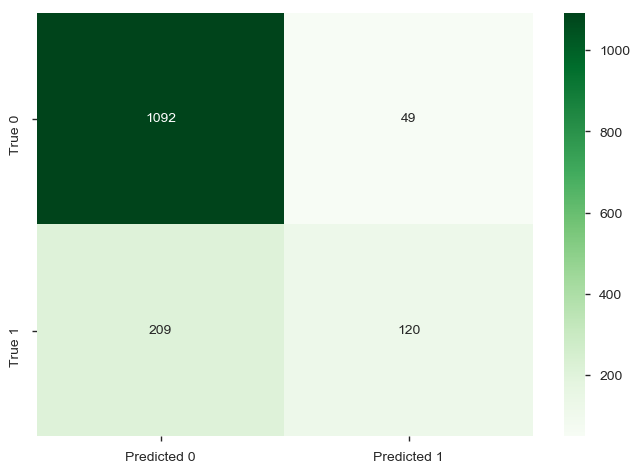

In [38]:
#Confusion Matrix
print("Confusion Matrix")
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

 ## Grid Search

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [39]:
#Finding best parameters for our SVC model
svc = SVC()
svc.get_params()
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = RandomizedSearchCV(svc, param_distributions=param, scoring='accuracy', cv=10)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
grid_svc.fit(X_train, y_train)

In [41]:
#Best parameters for our svc model
grid_svc.best_params_

#Best score for our svc model
grid_svc.best_score_

paramgrid = {
    'C': [1.2],
    'kernel':['rbf'],
    'gamma' :[0.9]
}

In [42]:
paramgrid = {
    'C': [1.2],
    'kernel':['rbf'],
    'gamma' :[0.9]
}
grid_svc1 = GridSearchCV(svc, paramgrid, scoring='accuracy', cv=5)

In [43]:
grid_svc1.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.2], 'kernel': ['rbf'], 'gamma': [0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
#Best score for our svc model
grid_svc1.best_score_

0.7872601061657819

In [45]:
grid_svc1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.2], 'kernel': ['rbf'], 'gamma': [0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
#Best score for our svc model
grid_svc1.best_score_

0.8424737456242707

In [47]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf',)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1141
           1       0.99      0.33      0.49       329

   micro avg       0.85      0.85      0.85      1470
   macro avg       0.91      0.66      0.70      1470
weighted avg       0.87      0.85      0.82      1470

